In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from multiprocessing import Pool
from astropy.coordinates import SkyCoord

# %matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d    
import random

In [21]:
 # Importing the dataset containing optical clusters
df = pd.read_csv('data/ard_not_adv.csv', skiprows = 0)
df = df[df.amf_sn!=0]
df.sort_values(by=['amf_rh'],ascending=False)

,Unnamed: 0,Unnamed: 0.1,amf_no,amf_ra,amf_dec,amf_z,amf_lk,amf_rh,amf_r200,amf_rc,...,red_id,whl_id,glat,glon,amf_sn,intensity100,intensity857,intensity143,intensity353,cluster
0,0,0,5.0,260.6324,32.1398,0.2252,222.1219,200.7117,1.784,0.625,...,RMJ172227.2+320757.2,J172227.2+320757,31.846666,55.602221,24.655148,-0.000048,1.978746,-0.000006,0.001062,1
1,1,1,7.0,250.1485,46.6917,0.2248,225.9874,182.3373,1.725,0.495,...,RMJ164019.8+464241.5,J164019.8+464242,41.429880,72.599428,44.674799,-0.000269,1.196847,-0.000215,0.000722,1
2,3,3,10.0,203.1873,50.5346,0.3110,164.8704,179.1883,1.663,0.422,...,RMJ133238.4+503336.0,J133252.1+503134,65.305106,107.103759,25.696075,-0.000124,1.019871,-0.000129,0.000580,1
3,4,4,12.0,350.2432,29.2029,0.5231,165.0015,174.7108,1.518,0.390,...,RMJ232104.1+291134.5,J232104.1+291134,-29.646780,100.211077,13.793623,0.000047,4.913466,0.000091,0.001929,1
4,5,5,13.0,139.4938,51.7236,0.2574,169.5809,172.6889,1.676,0.199,...,RMJ091753.4+514337.5,J091753.4+514338,43.387615,166.090009,20.839521,0.000029,1.074994,0.000060,0.000894,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21001,21533,21533,54265.0,117.7965,28.4314,0.4498,21.3133,20.0019,0.721,0.090,...,-9999,J075110.0+282537,24.760679,192.272829,0.235375,-0.000085,1.742793,-0.000074,0.000728,1
21002,21534,21534,54266.0,10.2234,16.4729,0.3325,7.5789,20.0018,0.754,0.420,...,-9999,J004043.6+162754,-46.323866,119.270217,1.128670,-0.000071,1.821485,-0.000079,0.000611,1
21003,21535,21535,54272.0,332.5373,16.8053,0.2720,19.0528,20.0008,0.774,0.059,...,-9999,J221009.3+165449,-31.180104,76.542726,0.327218,-0.000112,2.181500,-0.000118,0.000789,1
21004,21536,21536,54273.0,321.0614,-5.5885,0.4036,7.3319,20.0008,0.734,0.260,...,-9999,J212412.8-053647,-36.312474,46.861993,0.906488,0.000283,3.162386,0.000297,0.001527,1


In [18]:
# Importing the dataset containing non-clusters
df2 = df[:1228] * 0

In [25]:
df2['intensity143'] = np.loadtxt('voids_signal143.csv',delimiter=', ')

In [26]:
df2

,Unnamed: 0,Unnamed: 0.1,amf_no,amf_ra,amf_dec,amf_z,amf_lk,amf_rh,amf_r200,amf_rc,...,red_id,whl_id,glat,glon,amf_sn,intensity100,intensity857,intensity143,intensity353,cluster
0,0,0,0.0,114.782,37.641,0.0,0.0,0.0,0.0,0.0,...,,,0.0,0.0,0.0,-0.000114,0.0,-0.000096,0.000936,0
1,0,0,0.0,184.261,1.326,0.0,0.0,0.0,0.0,0.0,...,,,0.0,0.0,0.0,0.000100,0.0,0.000107,0.000720,0
2,0,0,0.0,124.855,3.090,0.0,0.0,0.0,0.0,0.0,...,,,0.0,0.0,0.0,0.000075,0.0,0.000104,0.000748,0
3,0,0,0.0,230.976,13.239,0.0,0.0,0.0,0.0,0.0,...,,,-0.0,0.0,0.0,0.000002,0.0,-0.000020,0.000862,0
4,0,0,0.0,237.406,16.985,0.0,0.0,0.0,0.0,0.0,...,,,0.0,0.0,0.0,-0.000034,0.0,-0.000005,0.000540,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1223,0,0,0.0,344.903,0.155,0.0,0.0,0.0,0.0,0.0,...,,,0.0,0.0,0.0,0.000018,0.0,0.000045,0.001064,0
1224,0,0,0.0,323.714,-0.573,0.0,0.0,0.0,0.0,0.0,...,,,0.0,0.0,0.0,0.000118,0.0,0.000125,0.001068,0
1225,0,0,0.0,322.872,4.201,0.0,0.0,0.0,0.0,0.0,...,,,0.0,0.0,0.0,0.000043,0.0,0.000085,0.001014,0
1226,0,0,0.0,12.548,5.708,0.0,0.0,0.0,0.0,0.0,...,,,0.0,0.0,0.0,0.000055,0.0,0.000066,0.000885,0


In [31]:
# Combine real and fake data
df3 = df[:1228].append(df2, ignore_index=True)

---

# Predicting signal in one frequency based on signal in others

#### Training

In [32]:
# From the signal in the 100Ghz image and 353Ghz image, determine the expected signal in 143Ghz
# 50 percent of the sample has richness over 27, use the richer sample for training
X = df[df.amf_rh>27][['intensity100', 'intensity353']]
y = df[df.amf_rh>27]['intensity143']

regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Validation

In [33]:
# Build array of predictions for the half of the sample not used in training
X_val = df[df.amf_rh<27][['intensity100', 'intensity353']]

intensity143 = [regr.predict([[i,j]]) for i, j in X_val.values]

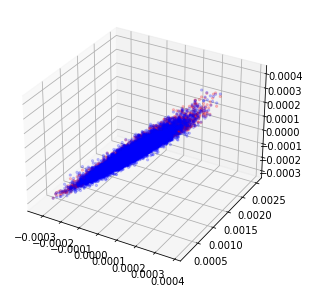

In [34]:
# Plot actual data vs predictions in three dimensions
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection='3d')

ax.scatter(df[df.amf_rh<27]['intensity100'], df[df.amf_rh<27]['intensity353'], df[df.amf_rh<27]['intensity143'],s=5,c='b', alpha=0.2)
ax.scatter(df[df.amf_rh<27]['intensity100'], df[df.amf_rh<27]['intensity353'], intensity143, s=5, c='r', alpha=0.2)
plt.show()

---

# Classification of clusters vs non clusters

In [36]:
# From the signal in the 100Ghz image and 353Ghz image, determine the expected signal in 143Ghz
# 50 percent of the sample has richness over 27, use the richer sample for training
intensity_clusters = df[['intensity100', 'intensity143', 'intensity353']]
intensity_voids = df2[['intensity100', 'intensity143', 'intensity353']]
intensity_combined = df3[['intensity100', 'intensity143', 'intensity353']]
cluster_tag = df3['cluster']

regr = linear_model.LinearRegression()
regr.fit(intensity_combined, cluster_tag)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
cluster = np.array([regr.predict([[intensity100, intensity143, intensity353]]) for intensity100, intensity143, intensity353 in intensity_clusters.values]).flatten()

In [38]:
no_cluster = np.array([regr.predict([[intensity100, intensity143, intensity353]]) for intensity100, intensity143, intensity353 in intensity_voids.values]).flatten()

(0.0, 4.0)

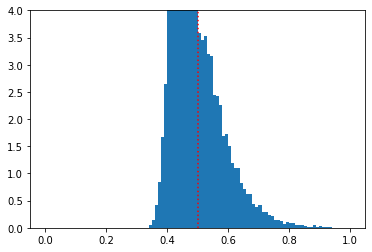

In [39]:
plt.hist(cluster,bins=100,range=(0,1),density=True)
plt.vlines(0.5,0,2000,color='r',linestyles='dotted')
plt.ylim(0,4)

(0.0, 9.0)

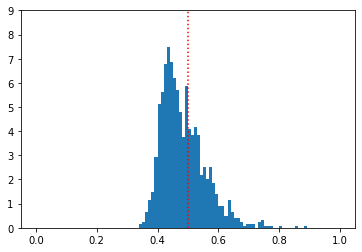

In [40]:
plt.hist(no_cluster,bins=100,range=(0,1),density=True)
plt.vlines(0.5,0,2000,color='r',linestyles='dotted')
plt.ylim(0,9)

---

# Identification of clusters

In [41]:
# Csv importer wrapped in a function that can be mapped for parallelization
def read_csv(filename):
    return pd.DataFrame(np.loadtxt(filename,delimiter=', ')).T

In [14]:
links100 = ['data/results100_1.csv','data/results100_2.csv','data/results100_3.csv',
         'data/results100_4.csv','data/results100_5.csv','data/results100_6.csv',
         'data/results100_7.csv','data/results100_8.csv','data/results100_9.csv',
         'data/results100_10.csv']
links143 = ['data/results143_1.csv','data/results143_2.csv','data/results143_3.csv',
         'data/results143_4.csv','data/results143_5.csv','data/results143_6.csv',
         'data/results143_7.csv','data/results143_8.csv','data/results143_9.csv',
         'data/results143_10.csv']
links353 = ['data/results353_1.csv','data/results353_2.csv','data/results353_3.csv',
         'data/results353_4.csv','data/results353_5.csv','data/results353_6.csv',
         'data/results353_7.csv','data/results353_8.csv','data/results353_9.csv',
         'data/results353_10.csv']

In [15]:
for links in [links100,links143,links353]:
    with Pool(processes=5) as pool: 
        df_list = pool.map(read_csv, links)
        if links==links100:
            data100 = pd.concat(df_list, ignore_index=True)
        if links==links143:
            data143 = pd.concat(df_list, ignore_index=True)
        if links==links353:
            data353 = pd.concat(df_list, ignore_index=True)

In [4]:
import healpy as hp

In [10]:
pl143 = hp.read_map('../../project1_PB/fitsData/COM_CompMap_Compton-SZMap-nilc-ymaps_2048_R2.00.fits')

NSIDE = 2048
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


In [17]:
# Convert the RA and DEC to galactic coordinates
c = SkyCoord(data100[1],data100[2],frame='icrs',unit='deg')
data100['glat'] = c.galactic.b.degree
data100['glon'] = c.galactic.l.degree

c = SkyCoord(data143[1],data143[2],frame='icrs',unit='deg')
data143['glat'] = c.galactic.b.degree
data143['glon'] = c.galactic.l.degree

c = SkyCoord(data353[1],data353[2],frame='icrs',unit='deg')
data353['glat'] = c.galactic.b.degree
data353['glon'] = c.galactic.l.degree

In [18]:
# initialize data of lists.
data_all = {'int100':data100[0],
            'int143':data143[0],
            'int353':data353[0]}
 
intensity_all = pd.DataFrame(data_all)

In [19]:
cluster_prob = np.array([regr.predict([[i,j,k]]) for i, j, k in intensity_all[['int100', 'int143', 'int353']].values]).flatten()

In [20]:
data100['cluster']=cluster_prob

NameError: name 'data100' is not defined

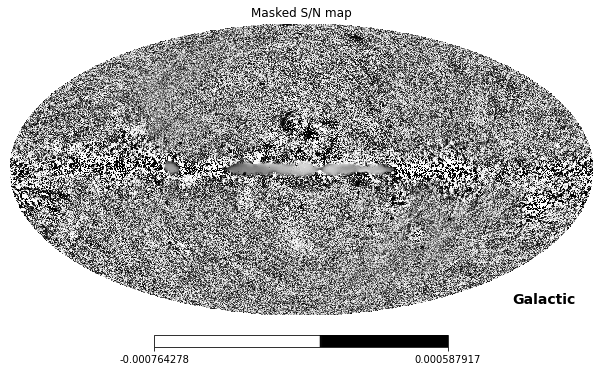

In [11]:
hp.mollview(pl143,norm='hist',cmap='Greys',coord=['G'],title='Masked S/N map')
# hp.visufunc.projscatter(data100['glon'],data100['glat'],c=data100.cluster,cmap='plasma',lonlat=True,s=10)
plt.scatter(data100['glon'],data100['glat'],c=data100.cluster,cmap='plasma',s=3)

In [13]:
min(pl143)

-0.0010954363970085979

In [14]:
max(pl143)

0.0006565084331668913

In [28]:
len(df)

21006

(array([ 127., 1376., 2311., 2274., 5255., 4150., 2636., 1933.,  881.,
          63.]),
 array([-21.0091 , -10.97081,  -0.93252,   9.10577,  19.14406,  29.18235,
         39.22064,  49.25893,  59.29722,  69.33551,  79.3738 ]),
 <BarContainer object of 10 artists>)

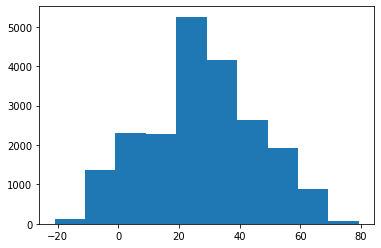

In [85]:
plt.hist(df['amf_dec'])

In [75]:
vals = []
for j in range(len(df)):
    pix = hp.ang2pix(2048,df.loc[j,'glon'],df.loc[j,'glat'],lonlat=True,nest=False)
    vals.append(pl143[pix])

In [88]:
from tqdm import tqdm
vals_fake = []
glons = []
glats = []
ras = []
decs = []
for j in tqdm(range(len(df)*3)):
    ra = random.uniform(0,360)
    dec = random.uniform(-20, 80)
    # Convert the RA and DEC to galactic coordinates
    c = SkyCoord(ra,dec,frame='icrs',unit='deg')

    glat = c.galactic.b.degree
    glon = c.galactic.l.degree

    if (glat>-25) and (glat<25):
        continue
    
    pix = hp.ang2pix(2048,glon,glat,lonlat=True,nest=False)
    if pl143[pix] < 0:
        ras.append(ra)
        decs.append(dec)
        glons.append(glon)
        glats.append(glat)
        vals_fake.append(pl143[pix])

100%|██████████| 63018/63018 [15:24<00:00, 68.13it/s]


In [89]:
len(vals_fake)

18373

In [91]:
voids_df = pd.DataFrame()
voids_df['ras'] = ras
voids_df['decs'] = decs
voids_df['glon'] = glons
voids_df['glat'] = glats
voids_df['y'] = vals_fake
voids_df.to_csv('voids_df.csv')

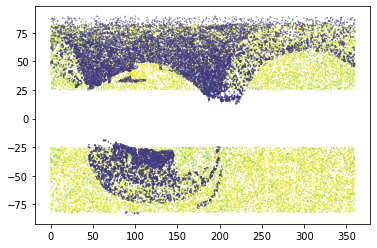

In [78]:
plt.scatter(glons,glats,c=vals_fake,s=0.1)
plt.scatter(df['glon'],df['glat'],c=vals,s=0.1)

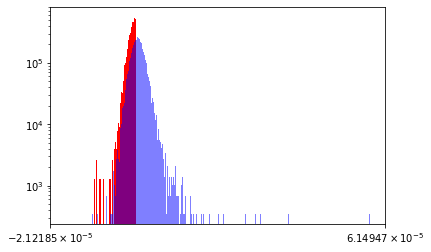

In [79]:
plt.hist(vals_fake,bins=500,density=True,facecolor='r')
plt.hist(vals,bins=500,density=True,facecolor='blue',alpha=0.5)
plt.yscale('log')
plt.xscale('symlog')

In [30]:
for j in range(dr9.shape[0]):
    pix = hp.ang2pix(2048,dr9.iloc[j,15],dr9.iloc[j,14],lonlat=True,nest=False)
    if pl143[pix] > 7:
        highglon.append("%.1f" % dr9.iloc[j,15])
        highglat.append("%.1f" % dr9.iloc[j,14])
        num.append(dr9.iloc[j,0])
        indx.append(j)


NameError: name 'dr9' is not defined